In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog vs Cat Dataset from Kaggle

In [3]:
!kaggle competitions download -c dogs-vs-cats

 96% 782M/812M [00:09<00:00, 49.4MB/s]
100% 812M/812M [00:09<00:00, 92.8MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
#extracting zip files
from zipfile import ZipFile
dataset = "/content/dogs-vs-cats.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [6]:
from zipfile import ZipFile
dataset = "/content/train.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [7]:
import os
#counting no. of files in train directory
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


Printing names of files

In [8]:
file_names = os.listdir("/content/train")
print(file_names)

['dog.3460.jpg', 'cat.4277.jpg', 'cat.11260.jpg', 'cat.10606.jpg', 'cat.9756.jpg', 'cat.9527.jpg', 'cat.2989.jpg', 'dog.5366.jpg', 'cat.2936.jpg', 'cat.221.jpg', 'cat.4412.jpg', 'dog.3155.jpg', 'dog.1825.jpg', 'dog.9739.jpg', 'dog.1830.jpg', 'cat.7924.jpg', 'dog.2047.jpg', 'dog.3542.jpg', 'cat.521.jpg', 'dog.7358.jpg', 'dog.7978.jpg', 'dog.9084.jpg', 'dog.2888.jpg', 'dog.6694.jpg', 'cat.8583.jpg', 'cat.9453.jpg', 'dog.2496.jpg', 'cat.11577.jpg', 'dog.3459.jpg', 'cat.1883.jpg', 'cat.5884.jpg', 'cat.1844.jpg', 'cat.9953.jpg', 'cat.6154.jpg', 'cat.2615.jpg', 'dog.2537.jpg', 'dog.2704.jpg', 'cat.8453.jpg', 'dog.483.jpg', 'cat.736.jpg', 'dog.9584.jpg', 'cat.6884.jpg', 'dog.3860.jpg', 'dog.7385.jpg', 'cat.11117.jpg', 'dog.6916.jpg', 'cat.10283.jpg', 'dog.11803.jpg', 'cat.5535.jpg', 'dog.7715.jpg', 'cat.5037.jpg', 'dog.9615.jpg', 'dog.12264.jpg', 'cat.1579.jpg', 'dog.4309.jpg', 'dog.5823.jpg', 'dog.10440.jpg', 'dog.5504.jpg', 'dog.5126.jpg', 'dog.7801.jpg', 'dog.761.jpg', 'dog.10235.jpg', 'do

Importing the Dependencies

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the Images

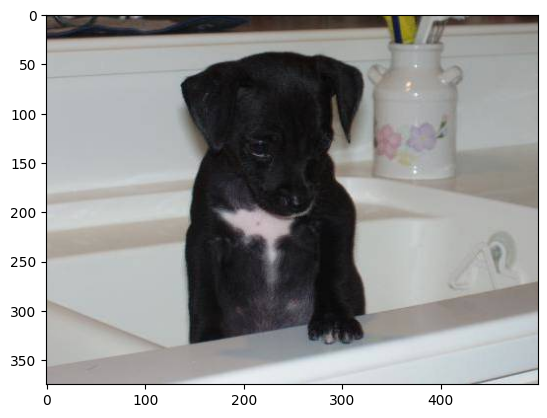

In [13]:
img = mpimg.imread("/content/train/dog.8298.jpg")
imgplot = plt.imshow(img)
plt.show()

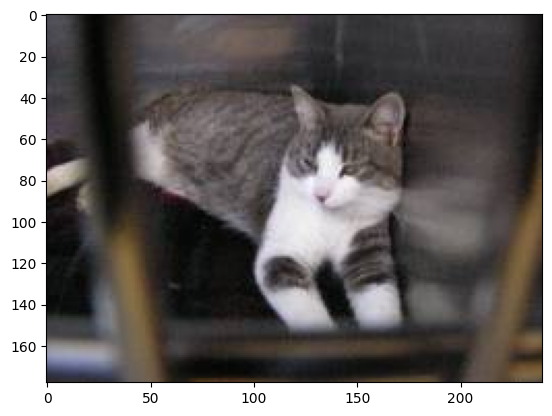

In [20]:
img = mpimg.imread("/content/train/cat.4277.jpg")
imgplot = plt.imshow(img)
plt.show()

In [21]:
files = ['dog' if 'dog' in filename else 'cat' for filename in os.listdir('/content/train')]

In [23]:
files.count('dog')

12500

In [24]:
files.count('cat')

12500

In [25]:
print('No. of Dog Images ',files.count('dog'))
print('No. of Cat Images ',files.count('cat'))

No. of Dog Images  12500
No. of Cat Images  12500


Resizing all the Images

In [26]:
os.mkdir('/content/image resized')

In [27]:
original_folder = '/content/train'
resized_folder = '/content/image resized'
for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder + '/' + filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImagePath = resized_folder+'/'+filename
  img.save(newImagePath)

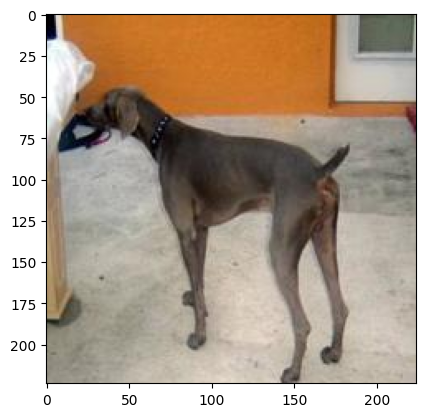

In [32]:
#displaying resized images
img = mpimg.imread("/content/image resized/dog.3460.jpg")
imgplot = plt.imshow(img)
plt.show()

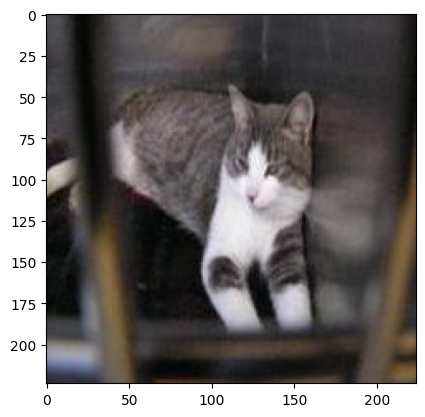

In [28]:
#displaying resized images
img = mpimg.imread("/content/image resized/cat.4277.jpg")
imgplot = plt.imshow(img)
plt.show()

Creating Labels for resized images

Cat --> 0

Dog --> 1

In [34]:
#creating a for loop to assign labels
filenames = os.listdir('/content/image resized')
labels = []
for i in range(2000):
  file_name= filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [35]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

[0 1] [ 972 1028]


Converting all the resized imagesto numpy arrays

In [36]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extention = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extention]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])